## Mini Project III

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [80]:
twm_accounts = pd.read_csv('twm_accounts.csv', delimiter=';')
twm_accounts.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [36]:
# 1409 records
twm_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [37]:
# 3 types of accounts CK, CC, SV
twm_accounts.acct_type.value_counts()

CK      520
CC      468
SV      421
Name: acct_type, dtype: int64

In [38]:
# The non-null  are the people who left
twm_accounts.account_active.value_counts()

Y     1266
N      143
Name: account_active, dtype: int64

In [39]:
# No duplication
duplicate_rows = twm_accounts[twm_accounts.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [acct_nbr, cust_id, acct_type, account_active, acct_start_date, acct_end_date, starting_balance, ending_balance]
Index: []


In [40]:
# a client can Have up to 3 accounts - 665 unique clients ID including people who left
twm_accounts.cust_id.value_counts()

1362806    3
1362705    3
1363128    3
1363291    3
1363018    3
          ..
1362982    1
1362848    1
1363150    1
1363276    1
1362654    1
Name: cust_id, Length: 665, dtype: int64

In [41]:
# the unique identifier for this table is the account Number
twm_accounts.acct_nbr.value_counts()

13628063    1
13634933    1
13633062    1
13631542    1
13627152    1
           ..
13625302    1
13632532    1
13631032    1
13625123    1
13627032    1
Name: acct_nbr, Length: 1409, dtype: int64

In [42]:

twm_accounts.acct_start_date = pd.to_datetime(twm_accounts.acct_start_date, format = "%d.%m.%Y")
twm_accounts.acct_end_date = pd.to_datetime(twm_accounts.acct_end_date, format = "%d.%m.%Y")
twm_accounts.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,1995-12-10,NaT,1430.22,284.58
1,4561143213627090,1362709,CC,Y,1993-03-15,NaT,266.34,496.15
2,4561143213628360,1362836,CC,Y,1992-03-18,NaT,55.90,1000.00
3,13633112,1363311,CK,Y,1995-07-06,NaT,11017.13,968.46
4,4561143213633610,1363361,CC,Y,1994-06-17,NaT,849.37,462.28


In [ ]:
# should we drop acct nbr and change type tp dummies, remove the departed accounts, standarize balance, remove stating date?

In [81]:
twm_checking_acct = pd.read_csv('twm_checking_acct.csv', delimiter=';')
twm_checking_acct.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [145]:
twm_checking_acct.cust_id.value_counts()

1362548    1
1362806    1
1363010    1
1362642    1
1362949    1
          ..
1362820    1
1362902    1
1363228    1
1363453    1
1363303    1
Name: cust_id, Length: 520, dtype: int64

In [82]:
twm_checking_acct.acct_nbr.nunique()


520

In [83]:
twm_checking_acct.cust_id.nunique()

520

In [51]:
twm_checking_acct.account_active.value_counts()

Y     468
N      52
Name: account_active, dtype: int64

In [84]:
twm_checking_acct.acct_start_date = pd.to_datetime(twm_checking_acct.acct_start_date, format = "%d.%m.%Y")
twm_checking_acct.acct_end_date = pd.to_datetime(twm_checking_acct.acct_end_date, format = "%d.%m.%Y")

In [53]:
twm_checking_acct.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,1986-11-11,NaT,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,1995-01-12,NaT,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,1994-03-19,NaT,2694.91,147.15
3,1362752,13627522,100,0.15,Y,1994-01-08,NaT,487.69,3.76
4,1363282,13632822,100,0.15,Y,1988-03-05,NaT,133.90,84.18


In [4]:
twm_checking_tran= pd.read_csv('twm_checking_tran.csv', delimiter=';')
twm_checking_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,-0.15,-0.15,0.0,58.99,29.1.1995,,,FK
1,1362784,90,-200.00,-200.00,0.0,1380.69,2.7.1995,53313,A,WD
2,1363088,46,0.00,0.00,0.0,128.35,26.3.1995,834,A,IQ
3,1363306,32,-40.32,-40.32,0.0,433.06,29.1.1995,,P,WD
4,1363251,11,-87.88,-87.88,0.0,1919.55,8.2.1995,,P,WD


In [55]:
# it seems That trans Id is a counter for the transactions for every cust_id

twm_checking_tran[twm_checking_tran['cust_id']==1363481].sort_values(by='tran_id', ascending=True)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
40329,1363481,1,-90.32,-90.32,0.0,112.24,3.1.1995,,P,WD
5397,1363481,2,-0.15,-0.15,0.0,112.09,3.1.1995,,,FK
16471,1363481,3,-56.04,-56.04,0.0,56.05,4.1.1995,,P,WD
28652,1363481,4,-0.15,-0.15,0.0,55.90,4.1.1995,,,FK
39868,1363481,5,-27.95,-27.95,0.0,27.95,4.1.1995,,P,WD
...,...,...,...,...,...,...,...,...,...,...
41649,1363481,95,-0.15,-0.15,0.0,103.77,15.3.1995,,,FK
6874,1363481,96,-51.89,-51.89,0.0,51.88,19.3.1995,191916,K,TR
18436,1363481,97,0.00,0.00,0.0,51.88,19.3.1995,191959,K,IQ
30010,1363481,98,0.00,0.00,0.0,51.88,20.3.1995,93635,C,IQ


In [56]:
twm_checking_tran[twm_checking_tran['cust_id']==1362784].sort_values(by='tran_id', ascending=True)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
32471,1362784,1,-434.01,-434.01,0.0,7016.71,26.1.1995,212233,A,TR
8914,1362784,2,592.08,592.08,0.0,7608.79,27.1.1995,94557,A,DP
31207,1362784,3,-281.76,-281.76,0.0,7327.03,30.1.1995,203718,E,WD
7594,1362784,4,601.13,601.13,0.0,7928.16,30.1.1995,203808,E,DP
30554,1362784,5,738.40,738.40,0.0,8666.56,31.1.1995,191711,E,DP
...,...,...,...,...,...,...,...,...,...,...
19651,1362784,95,-258.74,-258.74,0.0,756.14,18.7.1995,,P,WD
42814,1362784,96,-330.28,-330.28,0.0,425.86,19.7.1995,610,C,TR
18291,1362784,97,-212.93,-212.93,0.0,212.93,22.7.1995,,P,WD
41510,1362784,98,-0.75,-0.75,0.0,212.18,22.7.1995,1850,,FU


In [58]:
# "ATM," "Online," "Mobile,
twm_checking_tran.channel.value_counts() 

P     12198
      10765
A      8221
B      5112
C      2700
E      2291
V      2114
M      1664
K      1131
H         8
Name: channel, dtype: int64

In [59]:
#"Withdrawal," "Deposit," "Transfer," etc.).
twm_checking_tran.tran_code.value_counts()

WD      16194
IQ       8155
DP       6815
FK       6028
TR       4275
IN       1885
FP       1494
FU       1285
FM         73
Name: tran_code, dtype: int64

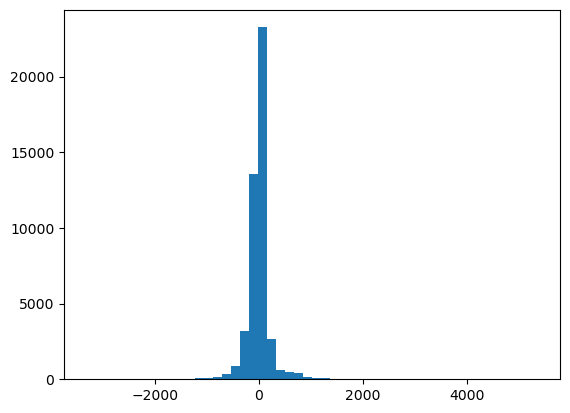

In [85]:

y = twm_checking_tran.tran_amt.values
plt.hist(y,bins=50)
plt.show()


In [119]:
std=twm_checking_tran.tran_amt.values.std()
std2=twm_checking_tran.tran_amt.values.std()*2

In [122]:
# define function to create age categories
def categorize_trans(trans):
    if abs(trans) < std:
        return "small"
    elif abs(trans) < std2:
        return "medium"
    else:
        return "large"

# create new column with age categories
twm_checking_tran['trans_Category'] = twm_checking_tran['tran_amt'].apply(categorize_trans)

In [117]:
# for i in range(len(twm_checking_tran['tran_amt'])):
#     if abs(twm_checking_tran['tran_amt'].iloc[i]) < std:
#         twm_checking_tran['size_trans'].iloc[i]= 0
#     elif abs(value)< std2:
#         twm_checking_tran['size_trans'].iloc[i]= 1
#     else:
#         twm_checking_tran['size_trans'].iloc[i]= 2

C:\Users\asmaa\AppData\Local\Temp\ipykernel_13664\3679404448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twm_checking_tran['size_trans'].iloc[i]= 0
C:\Users\asmaa\AppData\Local\Temp\ipykernel_13664\3679404448.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twm_checking_tran['size_trans'].iloc[i]= 2


In [123]:
twm_checking_tran.head(30)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code,size_trans,trans_Category
0,1363481,26,-0.15,-0.15,0.00,58.99,29.1.1995,,,FK,0,small
1,1362784,90,-200.00,-200.00,0.00,1380.69,2.7.1995,53313,A,WD,0,small
2,1363088,46,0.00,0.00,0.00,128.35,26.3.1995,834,A,IQ,0,small
3,1363306,32,-40.32,-40.32,0.00,433.06,29.1.1995,,P,WD,0,small
4,1363251,11,-87.88,-87.88,0.00,1919.55,8.2.1995,,P,WD,0,small
5,1363303,20,-58.58,-58.58,0.00,2660.59,25.2.1995,,P,WD,0,small
6,1362981,39,-311.06,-311.06,0.00,564.99,7.9.1995,160041,A,TR,2,medium
7,1363216,97,-45.11,-45.11,0.00,480.60,22.1.1995,,P,WD,0,small
8,1363253,62,0.94,0.00,0.94,751.88,30.6.1995,235959,,IN,0,small
9,1363442,16,-0.75,-0.75,0.00,4776.26,15.1.1995,115613,,FU,0,small


In [136]:
checking=twm_checking_tran[['cust_id','trans_Category']]

In [137]:
# create dummy variables for 'Color' column
dummies = pd.get_dummies(checking['trans_Category'], prefix='trans_Category')

# concatenate dummy variables with original DataFrame
checking = pd.concat([checking, dummies], axis=1)

# drop original 'Color' column
checking = checking.drop('trans_Category', axis=1)

In [138]:
checking.head(40)

,cust_id,trans_Category_large,trans_Category_medium,trans_Category_small
0,1363481,0,0,1
1,1362784,0,0,1
2,1363088,0,0,1
3,1363306,0,0,1
4,1363251,0,0,1
5,1363303,0,0,1
6,1362981,0,1,0
7,1363216,0,0,1
8,1363253,0,0,1
9,1363442,0,0,1


In [141]:
checking_sum=checking.groupby('cust_id').sum()

In [143]:
merged_account_cc = pd.merge(twm_accounts, checking_sum, on='cust_id', how='left')
merged_account_cc.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,trans_Category_large,trans_Category_medium,trans_Category_small
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,9.0,18.0,72.0
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0.0,7.0,92.0
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,0.0,5.0,94.0
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,11.0,26.0,62.0
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,3.0,10.0,86.0


In [148]:
twm_credit_acct= pd.read_csv('twm_credit_acct.csv', delimiter=';')
twm_credit_acct.head()

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [146]:
credit=twm_credit_acct[['cust_id','ending_balance']]
credit.head()

,cust_id,ending_balance
0,1363160,286.69
1,1362487,1548.23
2,1362548,68.68
3,1362752,0.00
4,1363017,1000.00


In [149]:
merged_account_cc_cd = pd.merge(merged_account_cc, credit, on='cust_id', how='left')
merged_account_cc_cd.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance_x,trans_Category_large,trans_Category_medium,trans_Category_small,ending_balance_y
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,9.0,18.0,72.0,1541.64
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0.0,7.0,92.0,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,0.0,5.0,94.0,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,11.0,26.0,62.0,2700.00
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,3.0,10.0,86.0,462.28


In [86]:
twm_credit_tran= pd.read_csv('twm_credit_tran.csv', delimiter=';')
twm_credit_tran.head()

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363088,46,-121.49,-121.49,0.0,-141.00,20.10.1995,101144,E,CG
1,1363306,32,-220.64,-220.64,0.0,-520.13,13.10.1995,83115,E,CG
2,1362959,10,0.00,0.00,0.0,-3900.00,26.2.1995,84129,K,IQ
3,1363429,13,-195.27,-195.27,0.0,-1739.74,3.1.1995,191815,E,CG
4,1363393,14,-37.32,-37.32,0.0,-198.98,4.7.1995,100811,E,CG


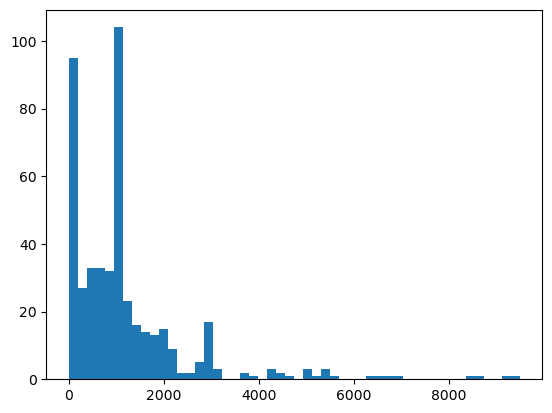

In [88]:
y = twm_credit_acct.ending_balance.values
plt.hist(y,bins=50)
plt.show()


In [60]:
twm_credit_tran.channel.value_counts() 

E     12603
M      3321
A      2622
C       626
B       403
V       290
K       265
         33
H         4
Name: channel, dtype: int64

In [62]:
twm_credit_tran.tran_code.value_counts() 

CG      12477
PM       4265
IQ       1802
CA       1590
FA         33
Name: tran_code, dtype: int64

In [7]:
twm_savings_acct= pd.read_csv('twm_savings_acct.csv', delimiter=';')
twm_savings_acct.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [150]:
savings=twm_savings_acct[['cust_id','ending_balance']]
merged_account_cc_cd_sv = pd.merge(merged_account_cc_cd, savings, on='cust_id', how='left')
merged_account_cc_cd_sv.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance_x,trans_Category_large,trans_Category_medium,trans_Category_small,ending_balance_y,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58,9.0,18.0,72.0,1541.64,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15,0.0,7.0,92.0,496.15,917.33
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00,0.0,5.0,94.0,1000.00,1009.19
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46,11.0,26.0,62.0,2700.00,299.67
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28,3.0,10.0,86.0,462.28,172.80


In [155]:
financial = merged_account_cc_cd_sv.rename(columns={'ending_balance_y':'credit_balance','ending_balance':'savings_balance'})

Index(['acct_nbr', 'cust_id', 'acct_type', 'account_active', 'acct_start_date',
       'acct_end_date', 'starting_balance', 'ending_balance_x',
       'trans_Category_large', 'trans_Category_medium', 'trans_Category_small',
       'ending_balance_y', 'ending_balance'],
      dtype='object')


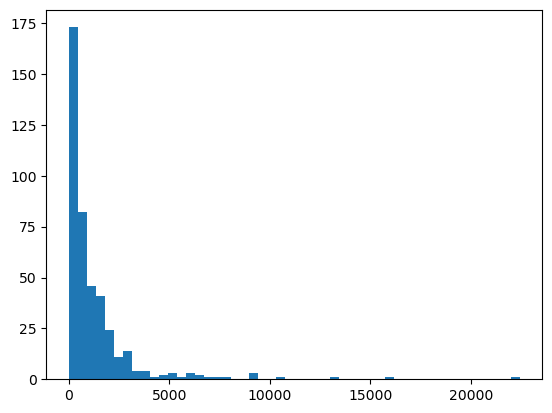

In [77]:
y = twm_savings_acct.ending_balance.values
plt.hist(y,bins=50)
plt.show()

In [72]:
twm_savings_tran= pd.read_csv('twm_savings_tran.csv', delimiter=';')
twm_savings_tran.head(20)

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
5,1362609,12,-167.04,-167.04,0.00,360.76,3.8.1995,213122,B,WD
6,1362905,2,91.55,91.55,0.00,615.15,10.2.1995,132042,B,DP
7,1362926,18,271.95,271.95,0.00,1507.62,18.6.1995,234752,E,DP
8,1362968,10,0.89,0.00,0.89,355.23,30.6.1995,235959,,IN
9,1362766,39,1894.54,1894.54,0.00,26016.69,16.9.1995,83342,A,DP


In [69]:
twm_savings_tran.cust_id.value_counts() 

1363468    62
1362567    57
1362827    55
1362766    55
1362777    55
           ..
1363254     7
1362964     6
1363135     5
1363351     4
1362952     3
Name: cust_id, Length: 420, dtype: int64

In [71]:
twm_transactions= pd.read_csv('twm_transactions.csv', delimiter=';')
twm_transactions.head(20)

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
5,32,13625032,-0.15,-0.15,0.0,2064.28,3.4.1995,0,,FK
6,60,13631642,-40.00,-40.00,0.0,737.03,17.1.1995,83649,A,WD
7,25,4561143213634590,-420.60,-420.60,0.0,-2142.46,14.12.1995,110142,E,CG
8,1,13631542,0.00,0.00,0.0,129.88,4.1.1995,100342,B,IQ
9,19,13627532,-40.00,-40.00,0.0,173.09,17.5.1995,133522,A,WD


In [67]:
twm_transactions.acct_nbr.value_counts() 

4561143213630020    155
4561143213626830    141
4561143213627770    137
4561143213632490    131
4561143213629780    112
                   ... 
4561143213631460      1
4561143213626190      1
4561143213631330      1
4561143213631690      1
13629502              1
Name: acct_nbr, Length: 1398, dtype: int64

In [64]:
twm_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB


In [10]:
twm_customer= pd.read_csv('twm_customer.csv', delimiter=';')
twm_customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [12]:
twm_customer.name_prefix.unique()


array(['        ', 'Mr.     ', 'Ms.     ', 'Mrs.    ', 'Dr.     ',
       'Miss    '], dtype=object)

In [15]:
duplicate_rows = twm_customer[twm_customer.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [cust_id, income, age, years_with_bank, nbr_children, gender, marital_status, name_prefix, first_name, last_name, street_nbr, street_name, postal_code, city_name, state_code]
Index: []


In [16]:
twm_customer.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [18]:
# May be drop al the column refereing to location and keep Postal code only
twm_customer.postal_code.nunique()

442

In [21]:
customer_clust_df = twm_customer.drop(columns=['first_name','last_name','street_nbr','street_name','cust_id','name_prefix'])
customer_clust_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,26150,46,5,1,M,2,89194,Las Vegas,NV
1,6605,71,1,0,M,2,90159,Los Angeles,CA
2,18548,38,8,0,F,1,90024,Los Angeles,CA
3,47668,54,3,0,F,1,90172,Los Angeles,CA
4,44554,59,9,2,F,4,10138,New York City,NY


In [90]:
customer_clust_df.city_name.value_counts()

New York City                               98
Los Angeles                                 84
Chicago                                     56
Houston                                     39
San Francisco                               23
                                            ..
Tampa                                        2
Colorado Springs                             2
Virginia Beach                               1
Arlington                                    1
Buffalo                                      1
Name: city_name, Length: 69, dtype: int64

In [92]:
customer_clust_df.nunique()

income             640
age                 77
years_with_bank     10
nbr_children         6
gender               2
marital_status       4
postal_code        442
city_name           69
state_code          33
dtype: int64

In [93]:
customer_clust_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,postal_code,city_name,state_code
0,26150,46,5,1,M,2,89194,Las Vegas,NV
1,6605,71,1,0,M,2,90159,Los Angeles,CA
2,18548,38,8,0,F,1,90024,Los Angeles,CA
3,47668,54,3,0,F,1,90172,Los Angeles,CA
4,44554,59,9,2,F,4,10138,New York City,NY


In [94]:
customer_clust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
 6   postal_code      747 non-null    int64 
 7   city_name        747 non-null    object
 8   state_code       747 non-null    object
dtypes: int64(6), object(3)
memory usage: 52.6+ KB


In [96]:
customer_clust_df.marital_status=customer_clust_df.marital_status.astype("str")
customer_clust_df=customer_clust_df.drop('postal_code', axis=1)

In [97]:
customer_clust_df.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name,state_code
0,26150,46,5,1,M,2,Las Vegas,NV
1,6605,71,1,0,M,2,Los Angeles,CA
2,18548,38,8,0,F,1,Los Angeles,CA
3,47668,54,3,0,F,1,Los Angeles,CA
4,44554,59,9,2,F,4,New York City,NY


In [100]:
df_state=customer_clust_df.drop('city_name', axis=1)

In [101]:
df_city=customer_clust_df.drop('state_code', axis=1)

In [102]:
categories = df_state.dtypes[df_state.dtypes == 'object'].index.tolist()
df_state_dummy = pd.get_dummies(df_state[categories])
df_state = pd.concat([df_state, df_state_dummy], axis=1)
df_final1 = df_state.drop(columns=categories)
df_final1.head()

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,...,state_code_NY,state_code_OH,state_code_OK,state_code_OR,state_code_PA,state_code_TN,state_code_TX,state_code_VA,state_code_WA,state_code_WI
0,26150,46,5,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6605,71,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18548,38,8,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47668,54,3,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [104]:
categories = df_city.dtypes[df_city.dtypes == 'object'].index.tolist()
df_city_dummy = pd.get_dummies(df_city[categories])
df_city = pd.concat([df_city, df_city_dummy], axis=1)
df_final2 = df_city.drop(columns=categories)
df_final2.head()

,income,age,years_with_bank,nbr_children,gender_F,gender_M,marital_status_1,marital_status_2,marital_status_3,marital_status_4,...,city_name_Seattle,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita
0,26150,46,5,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6605,71,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18548,38,8,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47668,54,3,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44554,59,9,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_final2.to_csv('df_final2.csv', index=False)

In [169]:
financial.head()

,cust_id,acct_type,account_active,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance
0,1362806,SV,Y,9.0,18.0,72.0,1541.64,284.58
1,1362709,CC,Y,0.0,7.0,92.0,496.15,917.33
2,1362836,CC,Y,0.0,5.0,94.0,1000.00,1009.19
3,1363311,CK,Y,11.0,26.0,62.0,2700.00,299.67
4,1363361,CC,Y,3.0,10.0,86.0,462.28,172.80


In [172]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_id                1409 non-null   int64  
 1   acct_type              1409 non-null   object 
 2   account_active         1409 non-null   object 
 3   trans_Category_large   1219 non-null   float64
 4   trans_Category_medium  1219 non-null   float64
 5   trans_Category_small   1219 non-null   float64
 6   credit_balance         1149 non-null   float64
 7   savings_balance        1033 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 131.4+ KB


In [171]:
financial=financial.drop(['acct_end_date','acct_start_date','acct_nbr','starting_balance','ending_balance_x'], axis=1)

KeyError: "['acct_end_date', 'acct_start_date', 'acct_nbr', 'starting_balance', 'ending_balance_x'] not found in axis"

In [174]:
financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cust_id                1409 non-null   int64  
 1   acct_type              1409 non-null   object 
 2   account_active         1409 non-null   object 
 3   trans_Category_large   1219 non-null   float64
 4   trans_Category_medium  1219 non-null   float64
 5   trans_Category_small   1219 non-null   float64
 6   credit_balance         1149 non-null   float64
 7   savings_balance        1033 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 131.4+ KB


In [210]:
# create dummy variables for 'Color' column
dummies = pd.get_dummies(financial['acct_type'], prefix='acct_type')

# concatenate dummy variables with original DataFrame
financial_dummies = pd.concat([financial, dummies], axis=1)

# drop original 'Color' column
financial_final = financial_dummies.drop('acct_type', axis=1)

In [211]:
financial_final.head()

,cust_id,account_active,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance,acct_type_CC,acct_type_CK,acct_type_SV
0,1362806,Y,9.0,18.0,72.0,1541.64,284.58,0,0,1
1,1362709,Y,0.0,7.0,92.0,496.15,917.33,1,0,0
2,1362836,Y,0.0,5.0,94.0,1000.00,1009.19,1,0,0
3,1363311,Y,11.0,26.0,62.0,2700.00,299.67,0,1,0
4,1363361,Y,3.0,10.0,86.0,462.28,172.80,1,0,0


In [212]:
financial_grouped=financial_final.groupby('cust_id').max()

In [213]:
financial_grouped.head()

,account_active,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance,acct_type_CC,acct_type_CK,acct_type_SV
cust_id,,,,,,,,,
1362480,Y,7.0,8.0,84.0,20.00,1187.97,1,1,1
1362484,Y,2.0,3.0,94.0,369.72,2122.17,1,1,1
1362485,Y,5.0,7.0,87.0,1100.00,NaN,1,1,0
1362486,Y,0.0,1.0,24.0,NaN,116.24,0,1,1
1362487,Y,1.0,0.0,51.0,1548.23,12.89,1,1,1


In [216]:

financial_grouped=financial_grouped.fillna(0)

In [217]:
financial_grouped['account_active'] = financial_grouped['account_active'].replace({'Y ': 1, 'N ': 0})
financial_grouped.head()

,account_active,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance,acct_type_CC,acct_type_CK,acct_type_SV
cust_id,,,,,,,,,
1362480,1,7.0,8.0,84.0,20.00,1187.97,1,1,1
1362484,1,2.0,3.0,94.0,369.72,2122.17,1,1,1
1362485,1,5.0,7.0,87.0,1100.00,0.00,1,1,0
1362486,1,0.0,1.0,24.0,0.00,116.24,0,1,1
1362487,1,1.0,0.0,51.0,1548.23,12.89,1,1,1


In [218]:
financial_grouped['credit_balance']=np.log(financial_grouped['credit_balance']+1)
financial_grouped['savings_balance']=np.log(financial_grouped['savings_balance']+1)

In [220]:
financial_grouped.head(40)

,account_active,trans_Category_large,trans_Category_medium,trans_Category_small,credit_balance,savings_balance,acct_type_CC,acct_type_CK,acct_type_SV
cust_id,,,,,,,,,
1362480,1,7.0,8.0,84.0,3.044522,7.080843,1,1,1
1362484,1,2.0,3.0,94.0,5.915447,7.660666,1,1,1
1362485,1,5.0,7.0,87.0,7.003974,0.000000,1,1,0
1362486,1,0.0,1.0,24.0,0.000000,4.764223,0,1,1
1362487,1,1.0,0.0,51.0,7.345513,2.631169,1,1,1
1362488,1,0.0,6.0,93.0,0.000000,0.000000,0,1,0
1362489,1,7.0,12.0,80.0,3.044522,5.925992,1,1,1
1362492,1,15.0,20.0,64.0,7.601402,0.000000,1,1,0
1362496,1,0.0,0.0,0.0,0.000000,5.529667,0,0,1
